In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the MobileNetV2 model pre-trained on ImageNet, without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [3]:
# Freeze the base model layers so they don't get updated during training
base_model.trainable = False


In [4]:
# Add custom classification layers for the animal dataset
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer
x = Dense(128, activation='relu')(x)  # Dense layer
predictions = Dense(10, activation='softmax')(x)  # Output layer for 10 classes

In [5]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Set up data generators with train-validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)


In [8]:
# Training data generator
train_generator = datagen.flow_from_directory(
    'raw-img',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

Found 20947 images belonging to 10 classes.


In [9]:
# Validation data generator
validation_generator = datagen.flow_from_directory(
    'raw-img',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 5232 images belonging to 10 classes.


In [10]:
# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10


C:\Users\Shravani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


655/655 ━━━━━━━━━━━━━━━━━━━━ 502s 753ms/step - accuracy: 0.8673 - loss: 0.4339 - val_accuracy: 0.9461 - val_loss: 0.1746
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 510s 775ms/step - accuracy: 0.9485 - loss: 0.1608 - val_accuracy: 0.9495 - val_loss: 0.1628
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 497s 756ms/step - accuracy: 0.9535 - loss: 0.1414 - val_accuracy: 0.9451 - val_loss: 0.1683
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 469s 712ms/step - accuracy: 0.9599 - loss: 0.1210 - val_accuracy: 0.9492 - val_loss: 0.1670
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 464s 705ms/step - accuracy: 0.9633 - loss: 0.1103 - val_accuracy: 0.9419 - val_loss: 0.1876
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 460s 700ms/step - accuracy: 0.9657 - loss: 0.1014 - val_accuracy: 0.9518 - val_loss: 0.1704
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 465s 707ms/step - accuracy: 0.9709 - loss: 0.0844 - val_accuracy: 0.9507 - val_loss: 0.1653
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 486s 738ms/step - accuracy: 0.9737 - loss: 0.07

In [11]:
# Evaluate the model on the validation set
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_acc}')


164/164 ━━━━━━━━━━━━━━━━━━━━ 101s 614ms/step - accuracy: 0.9459 - loss: 0.1891
Test Accuracy: 0.9462920427322388


In [12]:
# Predict on the validation set
x_val, y_val = next(validation_generator)
predictions = model.predict(x_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [13]:
# Get the actual class labels from the validation set
predicted_labels = np.argmax(predictions, axis=1)


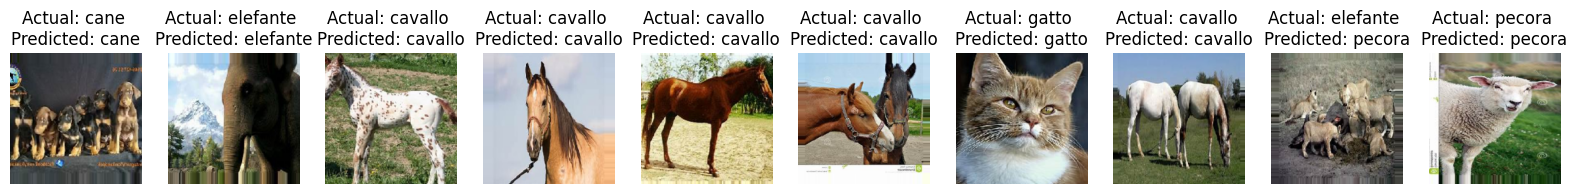

In [15]:
# Convert the dict_keys to a list
class_labels = list(train_generator.class_indices.keys())

# Number of images to display
n = 10

# Plot images with predicted and actual classes
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display the image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i])  # Display the image
    
    # Get actual and predicted labels
    actual_label = class_labels[np.argmax(y_val[i])]
    predicted_label = class_labels[predicted_labels[i]]
    
    # Set the title
    plt.title(f"Actual: {actual_label} \nPredicted: {predicted_label}")
    plt.axis('off')

plt.show()
